# Data Visualization Notebook

In [ ]:
#Package imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import math

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split

In [8]:
#Format imported data
df = pd.read_csv('All_data.csv')
df = df.drop(columns=['Unnamed: 12','Unnamed: 13','Unnamed: 13','Unnamed: 14'])
df_CHO = df[df['Adsorbate']=='CHO']
df_CHO = df_CHO.rename(columns={df.columns[-2]: "Eads-CHO"})

CHO_ml = df_CHO.drop(columns=['Adsorbate','Eads-CHO'])
for i in range(CHO_ml.shape[0]):
    if CHO_ml['Nsur5'].iloc[i] =='NI':
        CHO_ml['Nsur5'].iloc[i] ='Ni'
y6 = df_CHO['Eads-CHO']

top_df=df_CHO.loc[df_CHO['Eads-CHO'] < 0]
vis = pd.read_csv('site_infs.csv')
vis = vis[vis['Adsorbate']=='CHO']
vis = vis[vis['Site']==1]

In [3]:
#Feature Engineering Dictionnary. 
#Used to encode each atom in the local chem. env.
#period, group, EN, Nied
dorbitals = {'Co': [9,4,1.88,3],
         'Fe': [8,4,1.83,4],
         'Cu': [11,4,1.9,0],
         'Ni': [10,4,1.91,2],
         'Mo': [6,5,2.16,5],} 

In [4]:
#Generate Inputs for nn Model

cols = list(CHO_ml.columns)
s0 = [1,0,0,0,0,0,0,0,0,0]
s1 = [0,1,0,0,0,0,0,0,0,0]
s2 = [0,0,1,0,0,0,0,0,0,0]
s3 = [0,0,0,1,0,0,0,0,0,0]
s4 = [0,0,0,0,1,0,0,0,0,0]
s5 = [0,0,0,0,0,1,0,0,0,0]
s6 = [0,0,0,0,0,0,1,0,0,0]
s7 = [0,0,0,0,0,0,0,1,0,0]
s8 = [0,0,0,0,0,0,0,0,1,0]
s9 = [0,0,0,0,0,0,0,0,0,1]
df_np6 = np.empty((CHO_ml.shape[0],10,14))
for j in range(CHO_ml.shape[0]):
    l=np.empty((10,14))
    row = CHO_ml.iloc[j]
    for i in range(10):
        if i==0:
            gs = dorbitals[row[i]]
            g = gs+s0
            l[i,:] = g
        if i==1:
            gs = dorbitals[row[i]]
            g = gs+s1
            l[i,:] = g
        if i==2:
            gs = dorbitals[row[i]]
            g = gs+s2
            l[i,:] = g            
        if i==3:
            gs = dorbitals[row[i]]
            g = gs+s3
            l[i,:] = g
        if i==4:
            gs = dorbitals[row[i]]
            g = gs+s4
            l[i,:] = g
        if i==5:
            gs = dorbitals[row[i]]
            g = gs+s5
            l[i,:] = g
        if i==6:
            gs = dorbitals[row[i]]
            g = gs+s6
            l[i,:] = g
        if i==7:
            gs = dorbitals[row[i]]
            g = gs+s7
            l[i,:] = g
        if i==8:
            gs = dorbitals[row[i]]
            g = gs+s8
            l[i,:] = g
        if i==9:
            gs = dorbitals[row[i]]
            g = gs+s9
            l[i,:] = g
    df_np6[j,:,:] = l

In [5]:
# Model Training 

x_train, x_test, y_train, y_test = train_test_split(df_np6,y6, test_size=0.15)
class MyModel(tf.keras.Model):
  def __init__(self, ):
    super(MyModel, self).__init__()
    self.w1 = tf.keras.layers.Dense(6, activation='tanh', use_bias=False)
    self.w3 = tf.keras.layers.Dense(1, activation='linear', use_bias=False)
  def call(self, inputs):
    x = self.w1(inputs)
    x = self.w3(x)
    return tf.math.reduce_sum(x, axis=1,)
model = MyModel()
model.compile(optimizer='adam', loss='mse', metrics=['mae','mse'])
h = model.fit(x_train, y_train, epochs=3000, callbacks=[], )
y1 = model.evaluate(x_test, y_test, verbose=1)

2023-05-06 12:23:36.880626: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 12:23:36.931104: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/3000
6/6 [==============================] - 0s 1ms/step - loss: 177.4633 - mae: 13.2626 - mse: 177.4633
Epoch 2/3000
6/6 [==============================] - 0s 2ms/step - loss: 146.5058 - mae: 12.0341 - mse: 146.5058
Epoch 3/3000
6/6 [==============================] - 0s 2ms/step - loss: 116.5308 - mae: 10.7189 - mse: 116.5308
Epoch 4/3000
6/6 [==============================] - 0s 2ms/step - loss: 88.4264 - mae: 9.3141 - mse: 88.4264
Epoch 5/3000
6/6 [==============================] - 0s 1ms/step - loss: 62.9625 - mae: 7.8263 - mse: 62.9625
Epoch 6/3000
6/6 [==============================] - 0s 2ms/step - loss: 41.2096 - mae: 6.2798 - mse: 41.2096
Epoch 7/3000
6/6 [==============================] - 0s 2ms/step - loss: 23.9947 - mae: 4.7178 - mse: 23.9947
Epoch 8/3000
6/6 [==============================] - 0s 2ms/step - loss: 12.0353 - mae: 3.2121 - mse: 12.0353
Epoch 9/3000
6/6 [==============================] - 0s 2ms/step - loss: 5.0138 - mae: 1.8979 - mse: 5.0138
Epoch 10/300

6/6 [==============================] - 0s 1ms/step - loss: 0.6275 - mae: 0.6419 - mse: 0.6275
Epoch 77/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.6157 - mae: 0.6327 - mse: 0.6157
Epoch 78/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.6052 - mae: 0.6243 - mse: 0.6052
Epoch 79/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.5984 - mae: 0.6228 - mse: 0.5984
Epoch 80/3000
6/6 [==============================] - 0s 866us/step - loss: 0.5840 - mae: 0.6179 - mse: 0.5840
Epoch 81/3000
6/6 [==============================] - 0s 902us/step - loss: 0.5756 - mae: 0.6106 - mse: 0.5756
Epoch 82/3000
6/6 [==============================] - 0s 843us/step - loss: 0.5646 - mae: 0.6046 - mse: 0.5646
Epoch 83/3000
6/6 [==============================] - 0s 906us/step - loss: 0.5548 - mae: 0.6010 - mse: 0.5548
Epoch 84/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.5488 - mae: 0.6012 - mse: 0.5488
Epoch 85/3000
6/6 [===============

6/6 [==============================] - 0s 902us/step - loss: 0.1930 - mae: 0.3460 - mse: 0.1930
Epoch 151/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.1918 - mae: 0.3432 - mse: 0.1918
Epoch 152/3000
6/6 [==============================] - 0s 984us/step - loss: 0.1893 - mae: 0.3413 - mse: 0.1893
Epoch 153/3000
6/6 [==============================] - 0s 972us/step - loss: 0.1869 - mae: 0.3401 - mse: 0.1869
Epoch 154/3000
6/6 [==============================] - 0s 924us/step - loss: 0.1850 - mae: 0.3389 - mse: 0.1850
Epoch 155/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.1829 - mae: 0.3359 - mse: 0.1829
Epoch 156/3000
6/6 [==============================] - 0s 916us/step - loss: 0.1804 - mae: 0.3334 - mse: 0.1804
Epoch 157/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.1785 - mae: 0.3302 - mse: 0.1785
Epoch 158/3000
6/6 [==============================] - 0s 866us/step - loss: 0.1769 - mae: 0.3282 - mse: 0.1769
Epoch 159/3000
6/6 [==

6/6 [==============================] - 0s 1ms/step - loss: 0.1166 - mae: 0.2542 - mse: 0.1166
Epoch 225/3000
6/6 [==============================] - 0s 4ms/step - loss: 0.1165 - mae: 0.2546 - mse: 0.1165
Epoch 226/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.1155 - mae: 0.2538 - mse: 0.1155
Epoch 227/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.1156 - mae: 0.2527 - mse: 0.1156
Epoch 228/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.1148 - mae: 0.2523 - mse: 0.1148
Epoch 229/3000
6/6 [==============================] - 0s 944us/step - loss: 0.1142 - mae: 0.2523 - mse: 0.1142
Epoch 230/3000
6/6 [==============================] - 0s 931us/step - loss: 0.1139 - mae: 0.2518 - mse: 0.1139
Epoch 231/3000
6/6 [==============================] - 0s 914us/step - loss: 0.1136 - mae: 0.2513 - mse: 0.1136
Epoch 232/3000
6/6 [==============================] - 0s 878us/step - loss: 0.1131 - mae: 0.2509 - mse: 0.1131
Epoch 233/3000
6/6 [======

6/6 [==============================] - 0s 1ms/step - loss: 0.0961 - mae: 0.2300 - mse: 0.0961
Epoch 299/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0956 - mae: 0.2288 - mse: 0.0956
Epoch 300/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0952 - mae: 0.2289 - mse: 0.0952
Epoch 301/3000
6/6 [==============================] - 0s 874us/step - loss: 0.0948 - mae: 0.2281 - mse: 0.0948
Epoch 302/3000
6/6 [==============================] - 0s 885us/step - loss: 0.0949 - mae: 0.2285 - mse: 0.0949
Epoch 303/3000
6/6 [==============================] - 0s 897us/step - loss: 0.0945 - mae: 0.2277 - mse: 0.0945
Epoch 304/3000
6/6 [==============================] - 0s 964us/step - loss: 0.0943 - mae: 0.2278 - mse: 0.0943
Epoch 305/3000
6/6 [==============================] - 0s 989us/step - loss: 0.0943 - mae: 0.2277 - mse: 0.0943
Epoch 306/3000
6/6 [==============================] - 0s 986us/step - loss: 0.0941 - mae: 0.2270 - mse: 0.0941
Epoch 307/3000
6/6 [==

6/6 [==============================] - 0s 868us/step - loss: 0.0813 - mae: 0.2110 - mse: 0.0813
Epoch 373/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0810 - mae: 0.2106 - mse: 0.0810
Epoch 374/3000
6/6 [==============================] - 0s 893us/step - loss: 0.0806 - mae: 0.2100 - mse: 0.0806
Epoch 375/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0814 - mae: 0.2120 - mse: 0.0814
Epoch 376/3000
6/6 [==============================] - 0s 956us/step - loss: 0.0810 - mae: 0.2108 - mse: 0.0810
Epoch 377/3000
6/6 [==============================] - 0s 939us/step - loss: 0.0807 - mae: 0.2099 - mse: 0.0807
Epoch 378/3000
6/6 [==============================] - 0s 987us/step - loss: 0.0802 - mae: 0.2098 - mse: 0.0802
Epoch 379/3000
6/6 [==============================] - 0s 906us/step - loss: 0.0799 - mae: 0.2094 - mse: 0.0799
Epoch 380/3000
6/6 [==============================] - 0s 869us/step - loss: 0.0797 - mae: 0.2090 - mse: 0.0797
Epoch 381/3000
6/6 [

6/6 [==============================] - 0s 976us/step - loss: 0.0701 - mae: 0.1971 - mse: 0.0701
Epoch 447/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0708 - mae: 0.1983 - mse: 0.0708
Epoch 448/3000
6/6 [==============================] - 0s 928us/step - loss: 0.0693 - mae: 0.1961 - mse: 0.0693
Epoch 449/3000
6/6 [==============================] - 0s 854us/step - loss: 0.0710 - mae: 0.2007 - mse: 0.0710
Epoch 450/3000
6/6 [==============================] - 0s 943us/step - loss: 0.0700 - mae: 0.1968 - mse: 0.0700
Epoch 451/3000
6/6 [==============================] - 0s 940us/step - loss: 0.0707 - mae: 0.1986 - mse: 0.0707
Epoch 452/3000
6/6 [==============================] - 0s 996us/step - loss: 0.0695 - mae: 0.1976 - mse: 0.0695
Epoch 453/3000
6/6 [==============================] - 0s 824us/step - loss: 0.0696 - mae: 0.1960 - mse: 0.0696
Epoch 454/3000
6/6 [==============================] - 0s 934us/step - loss: 0.0692 - mae: 0.1953 - mse: 0.0692
Epoch 455/3000
6/6

6/6 [==============================] - 0s 949us/step - loss: 0.0613 - mae: 0.1879 - mse: 0.0613
Epoch 521/3000
6/6 [==============================] - 0s 941us/step - loss: 0.0617 - mae: 0.1874 - mse: 0.0617
Epoch 522/3000
6/6 [==============================] - 0s 915us/step - loss: 0.0629 - mae: 0.1900 - mse: 0.0629
Epoch 523/3000
6/6 [==============================] - 0s 858us/step - loss: 0.0613 - mae: 0.1864 - mse: 0.0613
Epoch 524/3000
6/6 [==============================] - 0s 897us/step - loss: 0.0618 - mae: 0.1879 - mse: 0.0618
Epoch 525/3000
6/6 [==============================] - 0s 831us/step - loss: 0.0612 - mae: 0.1879 - mse: 0.0612
Epoch 526/3000
6/6 [==============================] - 0s 863us/step - loss: 0.0616 - mae: 0.1877 - mse: 0.0616
Epoch 527/3000
6/6 [==============================] - 0s 878us/step - loss: 0.0615 - mae: 0.1890 - mse: 0.0615
Epoch 528/3000
6/6 [==============================] - 0s 905us/step - loss: 0.0612 - mae: 0.1880 - mse: 0.0612
Epoch 529/3000
6

6/6 [==============================] - 0s 863us/step - loss: 0.0565 - mae: 0.1836 - mse: 0.0565
Epoch 595/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0558 - mae: 0.1820 - mse: 0.0558
Epoch 596/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0555 - mae: 0.1806 - mse: 0.0555
Epoch 597/3000
6/6 [==============================] - 0s 875us/step - loss: 0.0564 - mae: 0.1827 - mse: 0.0564
Epoch 598/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0573 - mae: 0.1827 - mse: 0.0573
Epoch 599/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0580 - mae: 0.1862 - mse: 0.0580
Epoch 600/3000
6/6 [==============================] - 0s 863us/step - loss: 0.0567 - mae: 0.1810 - mse: 0.0567
Epoch 601/3000
6/6 [==============================] - 0s 933us/step - loss: 0.0564 - mae: 0.1820 - mse: 0.0564
Epoch 602/3000
6/6 [==============================] - 0s 824us/step - loss: 0.0553 - mae: 0.1808 - mse: 0.0553
Epoch 603/3000
6/6 [====

6/6 [==============================] - 0s 964us/step - loss: 0.0528 - mae: 0.1753 - mse: 0.0528
Epoch 669/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0555 - mae: 0.1823 - mse: 0.0555
Epoch 670/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0523 - mae: 0.1769 - mse: 0.0523
Epoch 671/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0515 - mae: 0.1761 - mse: 0.0515
Epoch 672/3000
6/6 [==============================] - 0s 942us/step - loss: 0.0545 - mae: 0.1802 - mse: 0.0545
Epoch 673/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0566 - mae: 0.1853 - mse: 0.0566
Epoch 674/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0515 - mae: 0.1763 - mse: 0.0515
Epoch 675/3000
6/6 [==============================] - 0s 984us/step - loss: 0.0516 - mae: 0.1757 - mse: 0.0516
Epoch 676/3000
6/6 [==============================] - 0s 913us/step - loss: 0.0523 - mae: 0.1796 - mse: 0.0523
Epoch 677/3000
6/6 [======

6/6 [==============================] - 0s 1ms/step - loss: 0.0521 - mae: 0.1800 - mse: 0.0521
Epoch 743/3000
6/6 [==============================] - 0s 893us/step - loss: 0.0542 - mae: 0.1820 - mse: 0.0542
Epoch 744/3000
6/6 [==============================] - 0s 1000us/step - loss: 0.0514 - mae: 0.1774 - mse: 0.0514
Epoch 745/3000
6/6 [==============================] - 0s 879us/step - loss: 0.0574 - mae: 0.1883 - mse: 0.0574
Epoch 746/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0508 - mae: 0.1754 - mse: 0.0508
Epoch 747/3000
6/6 [==============================] - 0s 946us/step - loss: 0.0490 - mae: 0.1708 - mse: 0.0490
Epoch 748/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0504 - mae: 0.1752 - mse: 0.0504
Epoch 749/3000
6/6 [==============================] - 0s 871us/step - loss: 0.0494 - mae: 0.1735 - mse: 0.0494
Epoch 750/3000
6/6 [==============================] - 0s 931us/step - loss: 0.0481 - mae: 0.1710 - mse: 0.0481
Epoch 751/3000
6/6 [=

6/6 [==============================] - 0s 897us/step - loss: 0.0466 - mae: 0.1694 - mse: 0.0466
Epoch 817/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0468 - mae: 0.1694 - mse: 0.0468
Epoch 818/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0460 - mae: 0.1685 - mse: 0.0460
Epoch 819/3000
6/6 [==============================] - 0s 943us/step - loss: 0.0460 - mae: 0.1683 - mse: 0.0460
Epoch 820/3000
6/6 [==============================] - 0s 865us/step - loss: 0.0468 - mae: 0.1708 - mse: 0.0468
Epoch 821/3000
6/6 [==============================] - 0s 851us/step - loss: 0.0462 - mae: 0.1692 - mse: 0.0462
Epoch 822/3000
6/6 [==============================] - 0s 898us/step - loss: 0.0474 - mae: 0.1724 - mse: 0.0474
Epoch 823/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0461 - mae: 0.1682 - mse: 0.0461
Epoch 824/3000
6/6 [==============================] - 0s 876us/step - loss: 0.0469 - mae: 0.1703 - mse: 0.0469
Epoch 825/3000
6/6 [==

6/6 [==============================] - 0s 1ms/step - loss: 0.0468 - mae: 0.1739 - mse: 0.0468
Epoch 891/3000
6/6 [==============================] - 0s 922us/step - loss: 0.0491 - mae: 0.1753 - mse: 0.0491
Epoch 892/3000
6/6 [==============================] - 0s 970us/step - loss: 0.0445 - mae: 0.1685 - mse: 0.0445
Epoch 893/3000
6/6 [==============================] - 0s 856us/step - loss: 0.0439 - mae: 0.1672 - mse: 0.0439
Epoch 894/3000
6/6 [==============================] - 0s 954us/step - loss: 0.0439 - mae: 0.1663 - mse: 0.0439
Epoch 895/3000
6/6 [==============================] - 0s 979us/step - loss: 0.0436 - mae: 0.1672 - mse: 0.0436
Epoch 896/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0459 - mae: 0.1690 - mse: 0.0459
Epoch 897/3000
6/6 [==============================] - 0s 958us/step - loss: 0.0448 - mae: 0.1676 - mse: 0.0448
Epoch 898/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0451 - mae: 0.1702 - mse: 0.0451
Epoch 899/3000
6/6 [==

6/6 [==============================] - 0s 1ms/step - loss: 0.0451 - mae: 0.1690 - mse: 0.0451
Epoch 965/3000
6/6 [==============================] - 0s 988us/step - loss: 0.0442 - mae: 0.1695 - mse: 0.0442
Epoch 966/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0420 - mae: 0.1643 - mse: 0.0420
Epoch 967/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0437 - mae: 0.1652 - mse: 0.0437
Epoch 968/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0431 - mae: 0.1633 - mse: 0.0431
Epoch 969/3000
6/6 [==============================] - 0s 898us/step - loss: 0.0442 - mae: 0.1704 - mse: 0.0442
Epoch 970/3000
6/6 [==============================] - 0s 983us/step - loss: 0.0448 - mae: 0.1730 - mse: 0.0448
Epoch 971/3000
6/6 [==============================] - 0s 954us/step - loss: 0.0420 - mae: 0.1640 - mse: 0.0420
Epoch 972/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0440 - mae: 0.1678 - mse: 0.0440
Epoch 973/3000
6/6 [======

6/6 [==============================] - 0s 899us/step - loss: 0.0413 - mae: 0.1652 - mse: 0.0413
Epoch 1038/3000
6/6 [==============================] - 0s 868us/step - loss: 0.0403 - mae: 0.1596 - mse: 0.0403
Epoch 1039/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0393 - mae: 0.1591 - mse: 0.0393
Epoch 1040/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0403 - mae: 0.1624 - mse: 0.0403
Epoch 1041/3000
6/6 [==============================] - 0s 960us/step - loss: 0.0425 - mae: 0.1653 - mse: 0.0425
Epoch 1042/3000
6/6 [==============================] - 0s 947us/step - loss: 0.0416 - mae: 0.1654 - mse: 0.0416
Epoch 1043/3000
6/6 [==============================] - 0s 3ms/step - loss: 0.0445 - mae: 0.1690 - mse: 0.0445
Epoch 1044/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0430 - mae: 0.1646 - mse: 0.0430
Epoch 1045/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0426 - mae: 0.1689 - mse: 0.0426
Epoch 1046/3000
6/

6/6 [==============================] - 0s 915us/step - loss: 0.0389 - mae: 0.1561 - mse: 0.0389
Epoch 1111/3000
6/6 [==============================] - 0s 910us/step - loss: 0.0388 - mae: 0.1600 - mse: 0.0388
Epoch 1112/3000
6/6 [==============================] - 0s 953us/step - loss: 0.0371 - mae: 0.1560 - mse: 0.0371
Epoch 1113/3000
6/6 [==============================] - 0s 961us/step - loss: 0.0375 - mae: 0.1565 - mse: 0.0375
Epoch 1114/3000
6/6 [==============================] - 0s 896us/step - loss: 0.0394 - mae: 0.1634 - mse: 0.0394
Epoch 1115/3000
6/6 [==============================] - 0s 842us/step - loss: 0.0377 - mae: 0.1567 - mse: 0.0377
Epoch 1116/3000
6/6 [==============================] - 0s 898us/step - loss: 0.0408 - mae: 0.1616 - mse: 0.0408
Epoch 1117/3000
6/6 [==============================] - 0s 917us/step - loss: 0.0425 - mae: 0.1628 - mse: 0.0425
Epoch 1118/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0374 - mae: 0.1545 - mse: 0.0374
Epoch 1119

6/6 [==============================] - 0s 1ms/step - loss: 0.0350 - mae: 0.1528 - mse: 0.0350
Epoch 1184/3000
6/6 [==============================] - 0s 958us/step - loss: 0.0388 - mae: 0.1605 - mse: 0.0388
Epoch 1185/3000
6/6 [==============================] - 0s 905us/step - loss: 0.0382 - mae: 0.1593 - mse: 0.0382
Epoch 1186/3000
6/6 [==============================] - 0s 964us/step - loss: 0.0341 - mae: 0.1495 - mse: 0.0341
Epoch 1187/3000
6/6 [==============================] - 0s 838us/step - loss: 0.0348 - mae: 0.1511 - mse: 0.0348
Epoch 1188/3000
6/6 [==============================] - 0s 909us/step - loss: 0.0338 - mae: 0.1494 - mse: 0.0338
Epoch 1189/3000
6/6 [==============================] - 0s 891us/step - loss: 0.0341 - mae: 0.1512 - mse: 0.0341
Epoch 1190/3000
6/6 [==============================] - 0s 950us/step - loss: 0.0344 - mae: 0.1505 - mse: 0.0344
Epoch 1191/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0344 - mae: 0.1510 - mse: 0.0344
Epoch 1192/3

6/6 [==============================] - 0s 895us/step - loss: 0.0315 - mae: 0.1449 - mse: 0.0315
Epoch 1257/3000
6/6 [==============================] - 0s 952us/step - loss: 0.0337 - mae: 0.1506 - mse: 0.0337
Epoch 1258/3000
6/6 [==============================] - 0s 937us/step - loss: 0.0354 - mae: 0.1489 - mse: 0.0354
Epoch 1259/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0332 - mae: 0.1511 - mse: 0.0332
Epoch 1260/3000
6/6 [==============================] - 0s 849us/step - loss: 0.0319 - mae: 0.1451 - mse: 0.0319
Epoch 1261/3000
6/6 [==============================] - 0s 960us/step - loss: 0.0330 - mae: 0.1471 - mse: 0.0330
Epoch 1262/3000
6/6 [==============================] - 0s 909us/step - loss: 0.0312 - mae: 0.1438 - mse: 0.0312
Epoch 1263/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0305 - mae: 0.1439 - mse: 0.0305
Epoch 1264/3000
6/6 [==============================] - 0s 873us/step - loss: 0.0300 - mae: 0.1414 - mse: 0.0300
Epoch 1265/3

6/6 [==============================] - 0s 1ms/step - loss: 0.0279 - mae: 0.1368 - mse: 0.0279
Epoch 1330/3000
6/6 [==============================] - 0s 913us/step - loss: 0.0271 - mae: 0.1330 - mse: 0.0271
Epoch 1331/3000
6/6 [==============================] - 0s 907us/step - loss: 0.0296 - mae: 0.1412 - mse: 0.0296
Epoch 1332/3000
6/6 [==============================] - 0s 920us/step - loss: 0.0276 - mae: 0.1362 - mse: 0.0276
Epoch 1333/3000
6/6 [==============================] - 0s 974us/step - loss: 0.0276 - mae: 0.1354 - mse: 0.0276
Epoch 1334/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0281 - mae: 0.1359 - mse: 0.0281
Epoch 1335/3000
6/6 [==============================] - 0s 843us/step - loss: 0.0283 - mae: 0.1345 - mse: 0.0283
Epoch 1336/3000
6/6 [==============================] - 0s 982us/step - loss: 0.0327 - mae: 0.1411 - mse: 0.0327
Epoch 1337/3000
6/6 [==============================] - 0s 844us/step - loss: 0.0308 - mae: 0.1396 - mse: 0.0308
Epoch 1338/3

6/6 [==============================] - 0s 897us/step - loss: 0.0343 - mae: 0.1517 - mse: 0.0343
Epoch 1403/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0265 - mae: 0.1298 - mse: 0.0265
Epoch 1404/3000
6/6 [==============================] - 0s 944us/step - loss: 0.0284 - mae: 0.1388 - mse: 0.0284
Epoch 1405/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0254 - mae: 0.1304 - mse: 0.0254
Epoch 1406/3000
6/6 [==============================] - 0s 843us/step - loss: 0.0252 - mae: 0.1301 - mse: 0.0252
Epoch 1407/3000
6/6 [==============================] - 0s 901us/step - loss: 0.0255 - mae: 0.1293 - mse: 0.0255
Epoch 1408/3000
6/6 [==============================] - 0s 897us/step - loss: 0.0255 - mae: 0.1308 - mse: 0.0255
Epoch 1409/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0268 - mae: 0.1338 - mse: 0.0268
Epoch 1410/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0271 - mae: 0.1335 - mse: 0.0271
Epoch 1411/3000


6/6 [==============================] - 0s 1ms/step - loss: 0.0242 - mae: 0.1261 - mse: 0.0242
Epoch 1476/3000
6/6 [==============================] - 0s 878us/step - loss: 0.0240 - mae: 0.1266 - mse: 0.0240
Epoch 1477/3000
6/6 [==============================] - 0s 805us/step - loss: 0.0251 - mae: 0.1263 - mse: 0.0251
Epoch 1478/3000
6/6 [==============================] - 0s 921us/step - loss: 0.0245 - mae: 0.1252 - mse: 0.0245
Epoch 1479/3000
6/6 [==============================] - 0s 866us/step - loss: 0.0244 - mae: 0.1259 - mse: 0.0244
Epoch 1480/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0240 - mae: 0.1248 - mse: 0.0240
Epoch 1481/3000
6/6 [==============================] - 0s 956us/step - loss: 0.0238 - mae: 0.1260 - mse: 0.0238
Epoch 1482/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0251 - mae: 0.1302 - mse: 0.0251
Epoch 1483/3000
6/6 [==============================] - 0s 3ms/step - loss: 0.0267 - mae: 0.1334 - mse: 0.0267
Epoch 1484/3000


6/6 [==============================] - 0s 1ms/step - loss: 0.0302 - mae: 0.1391 - mse: 0.0302
Epoch 1549/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0229 - mae: 0.1215 - mse: 0.0229
Epoch 1550/3000
6/6 [==============================] - 0s 967us/step - loss: 0.0235 - mae: 0.1219 - mse: 0.0235
Epoch 1551/3000
6/6 [==============================] - 0s 931us/step - loss: 0.0229 - mae: 0.1221 - mse: 0.0229
Epoch 1552/3000
6/6 [==============================] - 0s 873us/step - loss: 0.0249 - mae: 0.1241 - mse: 0.0249
Epoch 1553/3000
6/6 [==============================] - 0s 980us/step - loss: 0.0242 - mae: 0.1263 - mse: 0.0242
Epoch 1554/3000
6/6 [==============================] - 0s 825us/step - loss: 0.0228 - mae: 0.1216 - mse: 0.0228
Epoch 1555/3000
6/6 [==============================] - 0s 860us/step - loss: 0.0235 - mae: 0.1233 - mse: 0.0235
Epoch 1556/3000
6/6 [==============================] - 0s 913us/step - loss: 0.0225 - mae: 0.1203 - mse: 0.0225
Epoch 1557/3

6/6 [==============================] - 0s 926us/step - loss: 0.0222 - mae: 0.1206 - mse: 0.0222
Epoch 1622/3000
6/6 [==============================] - 0s 930us/step - loss: 0.0223 - mae: 0.1210 - mse: 0.0223
Epoch 1623/3000
6/6 [==============================] - 0s 936us/step - loss: 0.0225 - mae: 0.1220 - mse: 0.0225
Epoch 1624/3000
6/6 [==============================] - 0s 867us/step - loss: 0.0238 - mae: 0.1247 - mse: 0.0238
Epoch 1625/3000
6/6 [==============================] - 0s 954us/step - loss: 0.0230 - mae: 0.1220 - mse: 0.0230
Epoch 1626/3000
6/6 [==============================] - 0s 819us/step - loss: 0.0232 - mae: 0.1205 - mse: 0.0232
Epoch 1627/3000
6/6 [==============================] - 0s 961us/step - loss: 0.0222 - mae: 0.1209 - mse: 0.0222
Epoch 1628/3000
6/6 [==============================] - 0s 874us/step - loss: 0.0239 - mae: 0.1234 - mse: 0.0239
Epoch 1629/3000
6/6 [==============================] - 0s 914us/step - loss: 0.0241 - mae: 0.1226 - mse: 0.0241
Epoch 16

6/6 [==============================] - 0s 910us/step - loss: 0.0252 - mae: 0.1269 - mse: 0.0252
Epoch 1695/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0218 - mae: 0.1189 - mse: 0.0218
Epoch 1696/3000
6/6 [==============================] - 0s 880us/step - loss: 0.0235 - mae: 0.1240 - mse: 0.0235
Epoch 1697/3000
6/6 [==============================] - 0s 936us/step - loss: 0.0211 - mae: 0.1160 - mse: 0.0211
Epoch 1698/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0212 - mae: 0.1162 - mse: 0.0212
Epoch 1699/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0221 - mae: 0.1208 - mse: 0.0221
Epoch 1700/3000
6/6 [==============================] - 0s 907us/step - loss: 0.0223 - mae: 0.1212 - mse: 0.0223
Epoch 1701/3000
6/6 [==============================] - 0s 946us/step - loss: 0.0216 - mae: 0.1176 - mse: 0.0216
Epoch 1702/3000
6/6 [==============================] - 0s 851us/step - loss: 0.0263 - mae: 0.1273 - mse: 0.0263
Epoch 1703/300

6/6 [==============================] - 0s 921us/step - loss: 0.0215 - mae: 0.1162 - mse: 0.0215
Epoch 1768/3000
6/6 [==============================] - 0s 983us/step - loss: 0.0205 - mae: 0.1136 - mse: 0.0205
Epoch 1769/3000
6/6 [==============================] - 0s 942us/step - loss: 0.0208 - mae: 0.1157 - mse: 0.0208
Epoch 1770/3000
6/6 [==============================] - 0s 961us/step - loss: 0.0211 - mae: 0.1158 - mse: 0.0211
Epoch 1771/3000
6/6 [==============================] - 0s 967us/step - loss: 0.0215 - mae: 0.1171 - mse: 0.0215
Epoch 1772/3000
6/6 [==============================] - 0s 911us/step - loss: 0.0212 - mae: 0.1133 - mse: 0.0212
Epoch 1773/3000
6/6 [==============================] - 0s 921us/step - loss: 0.0217 - mae: 0.1168 - mse: 0.0217
Epoch 1774/3000
6/6 [==============================] - 0s 863us/step - loss: 0.0222 - mae: 0.1197 - mse: 0.0222
Epoch 1775/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0220 - mae: 0.1237 - mse: 0.0220
Epoch 1776

6/6 [==============================] - 0s 965us/step - loss: 0.0209 - mae: 0.1143 - mse: 0.0209
Epoch 1841/3000
6/6 [==============================] - 0s 917us/step - loss: 0.0244 - mae: 0.1263 - mse: 0.0244
Epoch 1842/3000
6/6 [==============================] - 0s 948us/step - loss: 0.0286 - mae: 0.1370 - mse: 0.0286
Epoch 1843/3000
6/6 [==============================] - 0s 919us/step - loss: 0.0301 - mae: 0.1450 - mse: 0.0301
Epoch 1844/3000
6/6 [==============================] - 0s 973us/step - loss: 0.0286 - mae: 0.1328 - mse: 0.0286
Epoch 1845/3000
6/6 [==============================] - 0s 830us/step - loss: 0.0231 - mae: 0.1222 - mse: 0.0231
Epoch 1846/3000
6/6 [==============================] - 0s 957us/step - loss: 0.0230 - mae: 0.1209 - mse: 0.0230
Epoch 1847/3000
6/6 [==============================] - 0s 914us/step - loss: 0.0216 - mae: 0.1171 - mse: 0.0216
Epoch 1848/3000
6/6 [==============================] - 0s 870us/step - loss: 0.0232 - mae: 0.1193 - mse: 0.0232
Epoch 18

6/6 [==============================] - 0s 1ms/step - loss: 0.0198 - mae: 0.1131 - mse: 0.0198
Epoch 1914/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0198 - mae: 0.1117 - mse: 0.0198
Epoch 1915/3000
6/6 [==============================] - 0s 859us/step - loss: 0.0200 - mae: 0.1124 - mse: 0.0200
Epoch 1916/3000
6/6 [==============================] - 0s 977us/step - loss: 0.0199 - mae: 0.1125 - mse: 0.0199
Epoch 1917/3000
6/6 [==============================] - 0s 939us/step - loss: 0.0208 - mae: 0.1140 - mse: 0.0208
Epoch 1918/3000
6/6 [==============================] - 0s 935us/step - loss: 0.0200 - mae: 0.1115 - mse: 0.0200
Epoch 1919/3000
6/6 [==============================] - 0s 940us/step - loss: 0.0196 - mae: 0.1109 - mse: 0.0196
Epoch 1920/3000
6/6 [==============================] - 0s 991us/step - loss: 0.0223 - mae: 0.1185 - mse: 0.0223
Epoch 1921/3000
6/6 [==============================] - 0s 847us/step - loss: 0.0197 - mae: 0.1110 - mse: 0.0197
Epoch 1922/3

6/6 [==============================] - 0s 1ms/step - loss: 0.0219 - mae: 0.1153 - mse: 0.0219
Epoch 1987/3000
6/6 [==============================] - 0s 931us/step - loss: 0.0225 - mae: 0.1212 - mse: 0.0225
Epoch 1988/3000
6/6 [==============================] - 0s 894us/step - loss: 0.0212 - mae: 0.1130 - mse: 0.0212
Epoch 1989/3000
6/6 [==============================] - 0s 978us/step - loss: 0.0204 - mae: 0.1146 - mse: 0.0204
Epoch 1990/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0212 - mae: 0.1160 - mse: 0.0212
Epoch 1991/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0195 - mae: 0.1119 - mse: 0.0195
Epoch 1992/3000
6/6 [==============================] - 0s 891us/step - loss: 0.0225 - mae: 0.1193 - mse: 0.0225
Epoch 1993/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0206 - mae: 0.1132 - mse: 0.0206
Epoch 1994/3000
6/6 [==============================] - 0s 848us/step - loss: 0.0200 - mae: 0.1123 - mse: 0.0200
Epoch 1995/3000


6/6 [==============================] - 0s 891us/step - loss: 0.0235 - mae: 0.1250 - mse: 0.0235
Epoch 2060/3000
6/6 [==============================] - 0s 916us/step - loss: 0.0218 - mae: 0.1183 - mse: 0.0218
Epoch 2061/3000
6/6 [==============================] - 0s 963us/step - loss: 0.0199 - mae: 0.1120 - mse: 0.0199
Epoch 2062/3000
6/6 [==============================] - 0s 909us/step - loss: 0.0236 - mae: 0.1243 - mse: 0.0236
Epoch 2063/3000
6/6 [==============================] - 0s 844us/step - loss: 0.0213 - mae: 0.1167 - mse: 0.0213
Epoch 2064/3000
6/6 [==============================] - 0s 968us/step - loss: 0.0212 - mae: 0.1120 - mse: 0.0212
Epoch 2065/3000
6/6 [==============================] - 0s 924us/step - loss: 0.0267 - mae: 0.1325 - mse: 0.0267
Epoch 2066/3000
6/6 [==============================] - 0s 885us/step - loss: 0.0296 - mae: 0.1402 - mse: 0.0296
Epoch 2067/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0254 - mae: 0.1274 - mse: 0.0254
Epoch 2068

6/6 [==============================] - 0s 1ms/step - loss: 0.0194 - mae: 0.1112 - mse: 0.0194
Epoch 2133/3000
6/6 [==============================] - 0s 942us/step - loss: 0.0194 - mae: 0.1103 - mse: 0.0194
Epoch 2134/3000
6/6 [==============================] - 0s 983us/step - loss: 0.0193 - mae: 0.1095 - mse: 0.0193
Epoch 2135/3000
6/6 [==============================] - 0s 855us/step - loss: 0.0205 - mae: 0.1156 - mse: 0.0205
Epoch 2136/3000
6/6 [==============================] - 0s 877us/step - loss: 0.0202 - mae: 0.1097 - mse: 0.0202
Epoch 2137/3000
6/6 [==============================] - 0s 936us/step - loss: 0.0214 - mae: 0.1147 - mse: 0.0214
Epoch 2138/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0189 - mae: 0.1087 - mse: 0.0189
Epoch 2139/3000
6/6 [==============================] - 0s 946us/step - loss: 0.0196 - mae: 0.1109 - mse: 0.0196
Epoch 2140/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0208 - mae: 0.1160 - mse: 0.0208
Epoch 2141/300

6/6 [==============================] - 0s 1ms/step - loss: 0.0221 - mae: 0.1191 - mse: 0.0221
Epoch 2206/3000
6/6 [==============================] - 0s 849us/step - loss: 0.0192 - mae: 0.1111 - mse: 0.0192
Epoch 2207/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0200 - mae: 0.1126 - mse: 0.0200
Epoch 2208/3000
6/6 [==============================] - 0s 888us/step - loss: 0.0215 - mae: 0.1155 - mse: 0.0215
Epoch 2209/3000
6/6 [==============================] - 0s 954us/step - loss: 0.0196 - mae: 0.1095 - mse: 0.0196
Epoch 2210/3000
6/6 [==============================] - 0s 894us/step - loss: 0.0197 - mae: 0.1118 - mse: 0.0197
Epoch 2211/3000
6/6 [==============================] - 0s 993us/step - loss: 0.0186 - mae: 0.1083 - mse: 0.0186
Epoch 2212/3000
6/6 [==============================] - 0s 832us/step - loss: 0.0193 - mae: 0.1108 - mse: 0.0193
Epoch 2213/3000
6/6 [==============================] - 0s 990us/step - loss: 0.0206 - mae: 0.1153 - mse: 0.0206
Epoch 2214/3

6/6 [==============================] - 0s 990us/step - loss: 0.0198 - mae: 0.1118 - mse: 0.0198
Epoch 2279/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0194 - mae: 0.1085 - mse: 0.0194
Epoch 2280/3000
6/6 [==============================] - 0s 920us/step - loss: 0.0211 - mae: 0.1148 - mse: 0.0211
Epoch 2281/3000
6/6 [==============================] - 0s 991us/step - loss: 0.0209 - mae: 0.1158 - mse: 0.0209
Epoch 2282/3000
6/6 [==============================] - 0s 988us/step - loss: 0.0196 - mae: 0.1106 - mse: 0.0196
Epoch 2283/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0185 - mae: 0.1072 - mse: 0.0185
Epoch 2284/3000
6/6 [==============================] - 0s 983us/step - loss: 0.0188 - mae: 0.1092 - mse: 0.0188
Epoch 2285/3000
6/6 [==============================] - 0s 908us/step - loss: 0.0193 - mae: 0.1097 - mse: 0.0193
Epoch 2286/3000
6/6 [==============================] - 0s 902us/step - loss: 0.0223 - mae: 0.1160 - mse: 0.0223
Epoch 2287/3

6/6 [==============================] - 0s 919us/step - loss: 0.0188 - mae: 0.1083 - mse: 0.0188
Epoch 2352/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0188 - mae: 0.1090 - mse: 0.0188
Epoch 2353/3000
6/6 [==============================] - 0s 867us/step - loss: 0.0184 - mae: 0.1074 - mse: 0.0184
Epoch 2354/3000
6/6 [==============================] - 0s 944us/step - loss: 0.0189 - mae: 0.1096 - mse: 0.0189
Epoch 2355/3000
6/6 [==============================] - 0s 893us/step - loss: 0.0203 - mae: 0.1128 - mse: 0.0203
Epoch 2356/3000
6/6 [==============================] - 0s 942us/step - loss: 0.0211 - mae: 0.1152 - mse: 0.0211
Epoch 2357/3000
6/6 [==============================] - 0s 878us/step - loss: 0.0266 - mae: 0.1314 - mse: 0.0266
Epoch 2358/3000
6/6 [==============================] - 0s 908us/step - loss: 0.0181 - mae: 0.1076 - mse: 0.0181
Epoch 2359/3000
6/6 [==============================] - 0s 900us/step - loss: 0.0195 - mae: 0.1109 - mse: 0.0195
Epoch 2360

6/6 [==============================] - 0s 926us/step - loss: 0.0204 - mae: 0.1126 - mse: 0.0204
Epoch 2425/3000
6/6 [==============================] - 0s 878us/step - loss: 0.0208 - mae: 0.1122 - mse: 0.0208
Epoch 2426/3000
6/6 [==============================] - 0s 909us/step - loss: 0.0215 - mae: 0.1142 - mse: 0.0215
Epoch 2427/3000
6/6 [==============================] - 0s 911us/step - loss: 0.0219 - mae: 0.1197 - mse: 0.0219
Epoch 2428/3000
6/6 [==============================] - 0s 839us/step - loss: 0.0188 - mae: 0.1098 - mse: 0.0188
Epoch 2429/3000
6/6 [==============================] - 0s 870us/step - loss: 0.0186 - mae: 0.1070 - mse: 0.0186
Epoch 2430/3000
6/6 [==============================] - 0s 871us/step - loss: 0.0191 - mae: 0.1076 - mse: 0.0191
Epoch 2431/3000
6/6 [==============================] - 0s 960us/step - loss: 0.0232 - mae: 0.1245 - mse: 0.0232
Epoch 2432/3000
6/6 [==============================] - 0s 891us/step - loss: 0.0211 - mae: 0.1192 - mse: 0.0211
Epoch 24

6/6 [==============================] - 0s 859us/step - loss: 0.0185 - mae: 0.1087 - mse: 0.0185
Epoch 2498/3000
6/6 [==============================] - 0s 955us/step - loss: 0.0180 - mae: 0.1049 - mse: 0.0180
Epoch 2499/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0182 - mae: 0.1075 - mse: 0.0182
Epoch 2500/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0187 - mae: 0.1093 - mse: 0.0187
Epoch 2501/3000
6/6 [==============================] - 0s 809us/step - loss: 0.0191 - mae: 0.1069 - mse: 0.0191
Epoch 2502/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0182 - mae: 0.1071 - mse: 0.0182
Epoch 2503/3000
6/6 [==============================] - 0s 802us/step - loss: 0.0182 - mae: 0.1072 - mse: 0.0182
Epoch 2504/3000
6/6 [==============================] - 0s 797us/step - loss: 0.0183 - mae: 0.1072 - mse: 0.0183
Epoch 2505/3000
6/6 [==============================] - 0s 911us/step - loss: 0.0194 - mae: 0.1111 - mse: 0.0194
Epoch 2506/300

6/6 [==============================] - 0s 1ms/step - loss: 0.0210 - mae: 0.1111 - mse: 0.0210
Epoch 2571/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0184 - mae: 0.1074 - mse: 0.0184
Epoch 2572/3000
6/6 [==============================] - 0s 875us/step - loss: 0.0198 - mae: 0.1103 - mse: 0.0198
Epoch 2573/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0207 - mae: 0.1091 - mse: 0.0207
Epoch 2574/3000
6/6 [==============================] - 0s 854us/step - loss: 0.0200 - mae: 0.1084 - mse: 0.0200
Epoch 2575/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0211 - mae: 0.1179 - mse: 0.0211
Epoch 2576/3000
6/6 [==============================] - 0s 827us/step - loss: 0.0194 - mae: 0.1106 - mse: 0.0194
Epoch 2577/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0227 - mae: 0.1175 - mse: 0.0227
Epoch 2578/3000
6/6 [==============================] - 0s 817us/step - loss: 0.0199 - mae: 0.1126 - mse: 0.0199
Epoch 2579/3000
6/

6/6 [==============================] - 0s 821us/step - loss: 0.0215 - mae: 0.1166 - mse: 0.0215
Epoch 2644/3000
6/6 [==============================] - 0s 954us/step - loss: 0.0235 - mae: 0.1213 - mse: 0.0235
Epoch 2645/3000
6/6 [==============================] - 0s 810us/step - loss: 0.0208 - mae: 0.1147 - mse: 0.0208
Epoch 2646/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0191 - mae: 0.1101 - mse: 0.0191
Epoch 2647/3000
6/6 [==============================] - 0s 862us/step - loss: 0.0187 - mae: 0.1100 - mse: 0.0187
Epoch 2648/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0190 - mae: 0.1068 - mse: 0.0190
Epoch 2649/3000
6/6 [==============================] - 0s 921us/step - loss: 0.0192 - mae: 0.1085 - mse: 0.0192
Epoch 2650/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0180 - mae: 0.1043 - mse: 0.0180
Epoch 2651/3000
6/6 [==============================] - 0s 828us/step - loss: 0.0179 - mae: 0.1050 - mse: 0.0179
Epoch 2652/300

6/6 [==============================] - 0s 1ms/step - loss: 0.0198 - mae: 0.1124 - mse: 0.0198
Epoch 2717/3000
6/6 [==============================] - 0s 975us/step - loss: 0.0220 - mae: 0.1139 - mse: 0.0220
Epoch 2718/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0210 - mae: 0.1149 - mse: 0.0210
Epoch 2719/3000
6/6 [==============================] - 0s 893us/step - loss: 0.0220 - mae: 0.1196 - mse: 0.0220
Epoch 2720/3000
6/6 [==============================] - 0s 872us/step - loss: 0.0180 - mae: 0.1044 - mse: 0.0180
Epoch 2721/3000
6/6 [==============================] - 0s 868us/step - loss: 0.0181 - mae: 0.1041 - mse: 0.0181
Epoch 2722/3000
6/6 [==============================] - 0s 801us/step - loss: 0.0181 - mae: 0.1061 - mse: 0.0181
Epoch 2723/3000
6/6 [==============================] - 0s 973us/step - loss: 0.0203 - mae: 0.1110 - mse: 0.0203
Epoch 2724/3000
6/6 [==============================] - 0s 817us/step - loss: 0.0210 - mae: 0.1136 - mse: 0.0210
Epoch 2725/3

6/6 [==============================] - 0s 943us/step - loss: 0.0196 - mae: 0.1097 - mse: 0.0196
Epoch 2790/3000
6/6 [==============================] - 0s 988us/step - loss: 0.0215 - mae: 0.1137 - mse: 0.0215
Epoch 2791/3000
6/6 [==============================] - 0s 908us/step - loss: 0.0192 - mae: 0.1077 - mse: 0.0192
Epoch 2792/3000
6/6 [==============================] - 0s 911us/step - loss: 0.0183 - mae: 0.1094 - mse: 0.0183
Epoch 2793/3000
6/6 [==============================] - 0s 826us/step - loss: 0.0223 - mae: 0.1200 - mse: 0.0223
Epoch 2794/3000
6/6 [==============================] - 0s 962us/step - loss: 0.0208 - mae: 0.1114 - mse: 0.0208
Epoch 2795/3000
6/6 [==============================] - 0s 806us/step - loss: 0.0214 - mae: 0.1161 - mse: 0.0214
Epoch 2796/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0182 - mae: 0.1057 - mse: 0.0182
Epoch 2797/3000
6/6 [==============================] - 0s 907us/step - loss: 0.0195 - mae: 0.1077 - mse: 0.0195
Epoch 2798

6/6 [==============================] - 0s 972us/step - loss: 0.0182 - mae: 0.1066 - mse: 0.0182
Epoch 2863/3000
6/6 [==============================] - 0s 866us/step - loss: 0.0182 - mae: 0.1056 - mse: 0.0182
Epoch 2864/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0191 - mae: 0.1095 - mse: 0.0191
Epoch 2865/3000
6/6 [==============================] - 0s 839us/step - loss: 0.0180 - mae: 0.1044 - mse: 0.0180
Epoch 2866/3000
6/6 [==============================] - 0s 991us/step - loss: 0.0196 - mae: 0.1090 - mse: 0.0196
Epoch 2867/3000
6/6 [==============================] - 0s 906us/step - loss: 0.0243 - mae: 0.1244 - mse: 0.0243
Epoch 2868/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0200 - mae: 0.1115 - mse: 0.0200
Epoch 2869/3000
6/6 [==============================] - 0s 830us/step - loss: 0.0183 - mae: 0.1048 - mse: 0.0183
Epoch 2870/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0184 - mae: 0.1089 - mse: 0.0184
Epoch 2871/300

6/6 [==============================] - 0s 957us/step - loss: 0.0176 - mae: 0.1030 - mse: 0.0176
Epoch 2936/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0192 - mae: 0.1095 - mse: 0.0192
Epoch 2937/3000
6/6 [==============================] - 0s 819us/step - loss: 0.0184 - mae: 0.1073 - mse: 0.0184
Epoch 2938/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0177 - mae: 0.1037 - mse: 0.0177
Epoch 2939/3000
6/6 [==============================] - 0s 833us/step - loss: 0.0169 - mae: 0.1020 - mse: 0.0169
Epoch 2940/3000
6/6 [==============================] - 0s 1ms/step - loss: 0.0184 - mae: 0.1082 - mse: 0.0184
Epoch 2941/3000
6/6 [==============================] - 0s 830us/step - loss: 0.0183 - mae: 0.1078 - mse: 0.0183
Epoch 2942/3000
6/6 [==============================] - 0s 864us/step - loss: 0.0183 - mae: 0.1053 - mse: 0.0183
Epoch 2943/3000
6/6 [==============================] - 0s 993us/step - loss: 0.0203 - mae: 0.1121 - mse: 0.0203
Epoch 2944/300

In [6]:
#Calculate std of NN predictions. 

test = model.predict(x_test).tolist()
train = model.predict(x_train).tolist()
test1=[]
train1=[]
label=[]
for i in test:
    g=i[0]
    test1.append(g)
    label.append('test')
for i in train:
    g=i[0]
    train1.append(g)
    label.append('train')
total1= test1+train1
len(total1)
real1=list(y_test)+list(y_train)
d = {'predict': total1, 'real': real1,'label':label}
df = pd.DataFrame(data=d)
preds = df['predict']
reals = df['real']
subs = preds - reals
std_dev= np.std(subs)
x = [-4,4]
y = [-4-std_dev,4-std_dev]
hue=['low','low']
d1 = {'x':x,'lines': y,'hue':hue}
df1 = pd.DataFrame(data=d1)

x = [-4,4]
y = [-4+std_dev,4+std_dev]
hue=['up','up']
d2 = {'x':x,'lines': y,'hue':hue}
df2 = pd.DataFrame(data=d2)

Text(0.5, 1.0, 'Parity Plot (with 1 Standard Deviation Range)')

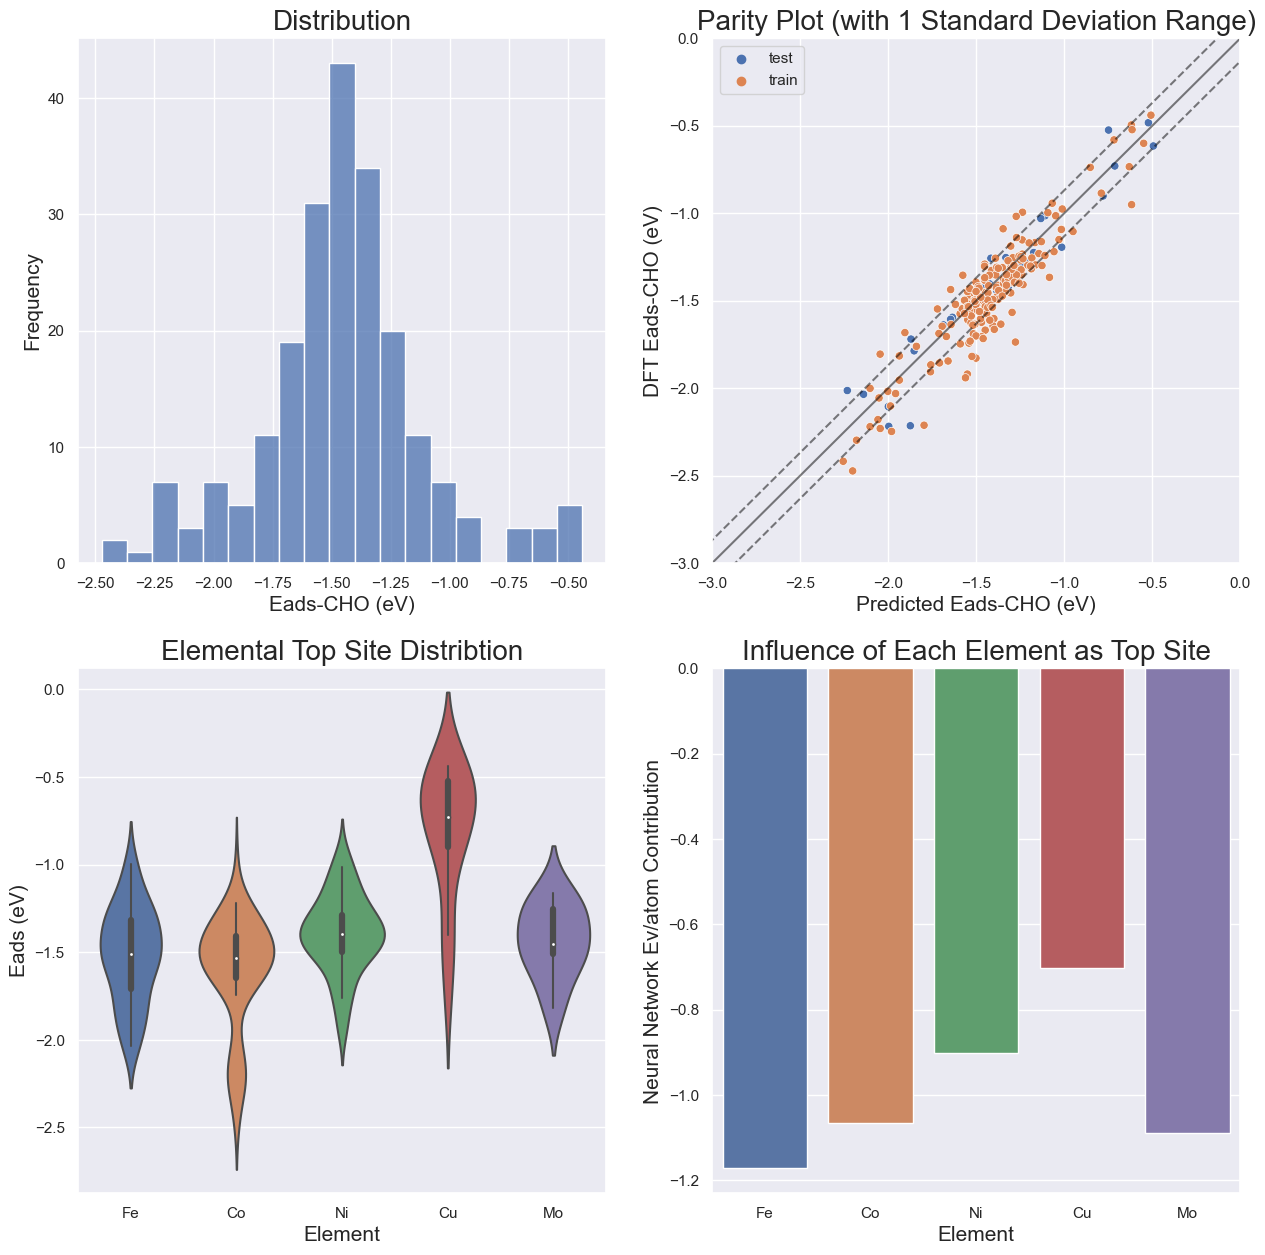

In [7]:
#Data visualization summarizing Distribution, NN performance, Element influences

sns.set_theme()
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

x1=sns.barplot(ax=axes[1, 1],x="Element", y="Ev/atom", data=vis,order=['Fe','Co','Ni','Cu','Mo'])
x1.set_xlabel("Element", fontsize = 15)
x1.set_ylabel("Neural Network Ev/atom Contribution", fontsize = 15)
x1.set_title("Influence of Each Element as Top Site", fontsize = 20)

x2=sns.violinplot(ax=axes[1, 0],x=top_df.columns[0], y="Eads-CHO", data=df_CHO,order=[ 'Fe','Co','Ni','Cu','Mo'])
x2.set_xlabel("Element", fontsize = 15)
x2.set_ylabel("Eads (eV)", fontsize = 15)
x2.set_title("Elemental Top Site Distribtion", fontsize = 20)

x3=sns.histplot(ax=axes[0, 0],data=df_CHO, x='Eads-CHO')
x3.set_xlabel("Eads-CHO (eV)", fontsize = 15)
x3.set_ylabel("Frequency", fontsize = 15)
x3.set_title("Distribution", fontsize = 20)

x4=sns.scatterplot(ax=axes[0,1],data=df, x='predict',y='real',hue='label',marker='o', color='b')
x4.set(xlim=(-3,0))
x4.set(ylim=(-3,0))
x4.plot([-4,4],[-4,4],color='black',alpha=0.5) 
x4=sns.lineplot(ax=axes[0,1],x='x',y='lines',data=df1,color='black',alpha  = 0.5)
x4.lines[1].set_linestyle("--")
x4=sns.lineplot(ax=axes[0,1],x='x',y='lines',data=df2,color='black',alpha  = 0.5)
x4.lines[2].set_linestyle("--")
x4.set_xlabel("Predicted Eads-CHO (eV)", fontsize = 15)
x4.set_ylabel("DFT Eads-CHO (eV)", fontsize = 15)
x4.set_title("Parity Plot (with 1 Standard Deviation Range)", fontsize = 20)
#sns.scatterplot(data=df, x='test',y='test',marker='o', color='b',ax=axes[0, 0])
#sns.scatter(y_train,yhat_train1,marker='x', color='r',label='Train')
#plt.savefig('CHO_fig')